In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [50]:
np.random.seed(0)

In [51]:
df = pd.read_csv('train.csv')

In [52]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack
0,134.3,7.1,64.0,40415.288320,40415.288320,0,0.0,0.0,0.0,0.5,...,48.225852,95.3,1.694641e+08,5.5,15.312231,68.201654,2644.242675,0.9,38.5,0
1,137.0,4.7,49.9,58749.191830,58749.191830,0,0.0,0.0,0.0,0.2,...,59.753361,125.6,1.694641e+08,13.5,13.468364,84.997147,5328.483794,1.0,244.6,0
2,283.9,6.0,64.0,3.497439,3.497439,0,0.0,0.0,0.0,0.5,...,10.223690,80.6,8.070000e-05,5.5,12.229315,14.458481,124.725884,0.9,38.5,0
3,297.3,6.0,64.0,7297.703020,7297.703020,0,0.0,0.0,0.0,0.5,...,15.625023,78.5,1.694641e+08,13.5,12.552920,21.904691,240.536207,1.0,244.6,0
4,572.3,7.1,57.7,2.549120,2.549120,0,0.0,0.0,0.0,0.4,...,69.738867,139.0,9.993820e-02,5.5,13.928729,98.625651,11737.768850,0.9,38.5,0


In [53]:
# Separate features and target variable
#features = df.iloc[:, :-1]  # All columns except the last
#target = df.iloc[:, -1]

# Split the data into features (X) and target (y)
X = df.drop('Attack', axis=1)
y = df['Attack']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=0)  # Adjust n_estimators as needed
#model.fit(features, target)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9990451859306857


In [56]:
# Make predictions on new data (assuming you have a separate DataFrame for new data)
#new_data = pd.DataFrame([[1.0, 2.5, ..., 42.3]])  # Replace with your new data
#predictions = model.predict(new_data)

train , test = df[df['Attack']==1],df[df['Attack']==0]

# Show the number of observations in test and training dataframes

print('Number of observations in the training dataset:', len(train))
print('Number of observations in the test dataset:', len(test))

Number of observations in the training dataset: 1019
Number of observations in the test dataset: 192732


In [57]:
# Print the predictions
#print(predictions)

In [58]:
features = df.columns[:45]
print(features)

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight'],
      dtype='object')


In [59]:
#Apply the train classifier to the test
model.predict(test[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
#Viewing the predicted probabilities of first 10 observations
model.predict_proba(test[features][0:10])

array([[0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.99, 0.01]])

In [61]:
#Mapping values for each predicted packet features
preds = df.Attack[model.predict(test[features])]
#View the predicted Attack or Benign for the first 5 records
preds[0:25]

0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
Name: Attack, dtype: int64

In [62]:
#Viewing the actual data for the first 5 packets
test['Attack'].head()

0    0
1    0
2    0
3    0
4    0
Name: Attack, dtype: int64

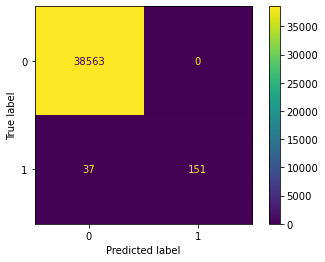

In [63]:
# Generate the confusion matrix
#cm = confusion_matrix(test, preds)

# Print the confusion matrix
#print("Confusion Matrix:")
#print(cm)

# Generate predictions with the best model
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();